In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import json

from app_store_scraper import AppStore

In [108]:
brilliant = AppStore(country='us', app_name='brilliant', app_id = '913335252')

2023-04-11 08:58:55,022 [INFO] Base - Initialised: AppStore('us', 'brilliant', 913335252)
2023-04-11 08:58:55,024 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/brilliant/id913335252


In [109]:
brilliant.review(how_many=10000)

2023-04-11 08:59:03,021 [INFO] Base - [id:913335252] Fetched 260 reviews (260 fetched in total)
2023-04-11 08:59:08,586 [INFO] Base - [id:913335252] Fetched 620 reviews (620 fetched in total)
2023-04-11 08:59:13,992 [INFO] Base - [id:913335252] Fetched 940 reviews (940 fetched in total)
2023-04-11 08:59:19,317 [INFO] Base - [id:913335252] Fetched 1240 reviews (1240 fetched in total)
2023-04-11 08:59:24,980 [INFO] Base - [id:913335252] Fetched 1560 reviews (1560 fetched in total)
2023-04-11 08:59:30,396 [INFO] Base - [id:913335252] Fetched 1860 reviews (1860 fetched in total)
2023-04-11 08:59:36,040 [INFO] Base - [id:913335252] Fetched 2160 reviews (2160 fetched in total)
2023-04-11 08:59:41,530 [INFO] Base - [id:913335252] Fetched 2440 reviews (2440 fetched in total)
2023-04-11 08:59:45,101 [INFO] Base - [id:913335252] Fetched 2627 reviews (2627 fetched in total)


In [580]:
brilliantdata = copy.deepcopy(brilliant.reviews)
brilliantdf = pd.DataFrame(np.array(brilliantdata),columns=['review'])
brilliantdata = pd.DataFrame(brilliantdf.pop('review').tolist())
brilliantdata = brilliantdata.sort_values(by='date')
brilliantdata = brilliantdata.reset_index()
brilliantdata = brilliantdata.drop('index',axis=1)

In [581]:
# Identify which is the first index of the next year (e.g. first review of 2016, 2017, etc.)
years = []
indices = []
for i in range(2015,2024):
    years.append(i)
    indices.append(i)
for i in range(brilliantdata.shape[0]):
    for j in range(len(years)):
        if (int(str(brilliantdata['date'][i])[:4])) == years[j]:
            if (indices[j] == years[j]):
                indices[j] = i   

# Separate review for each year into their own dataframe, nested in a dictionary 
# Key is year, Value is dataframe storing the information regarding the reviews
allYears = {}
for i in range(2015, 2024):
    if i == 2015:
        allYears[i] = brilliantdata.iloc[0:indices[1]-1]
    elif i == 2023:
        allYears[i] = brilliantdata.iloc[indices[8]:]
    else: 
        allYears[i] = brilliantdata.iloc[indices[i-2015]:indices[i+1-2015]-1]
for i in range(2015,2024):
    allYears[i] = allYears[i].sort_values(by = 'rating')

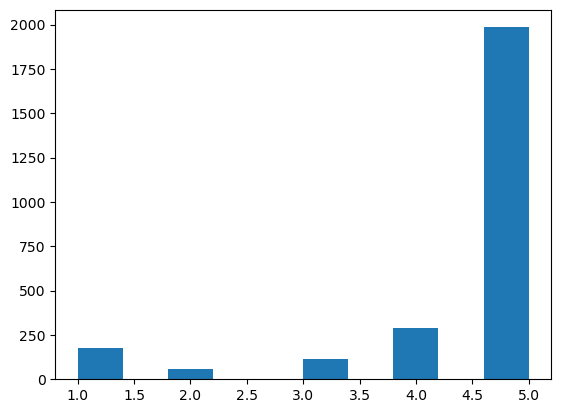

In [583]:
## Histogram
allratinghist = plt.hist(brilliantdata['rating'])

In [710]:
def drawPieChart(data, year):
    sizes = []
    for i in range(1,6):
        sizes.append(sum(data['rating'] == i)/len(data))
    colors = ['deepskyblue','paleturquoise','skyblue','dodgerblue','royalblue']
    finalcolors = []
    finalsizes = []
    labels = []
    j = 0
    for i in range(0,len(sizes)):
        if sizes[i] > 0:
            finalsizes.append(sizes[i])
            labels.append(str(i+1) + " Star")
            finalcolors.append(colors[j])
            j += 1
    print(labels)
    print(finalcolors)
    fig, ax = plt.subplots()
    finalcolors.reverse()
    plt.title("Ratings from " + str(year))
    allratings = ax.pie(finalsizes, labels=labels, colors = finalcolors)

['1 Star', '3 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue', 'dodgerblue', 'royalblue']
['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
['deepskyblue', 'paleturquoise', 'skyblue',

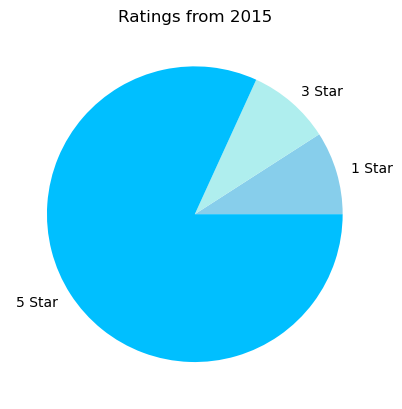

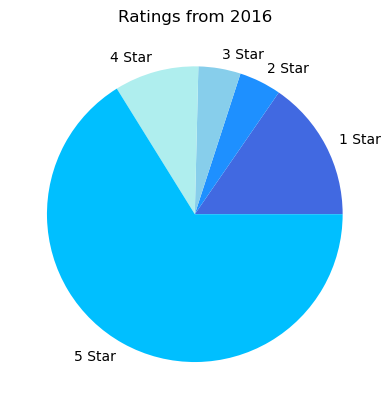

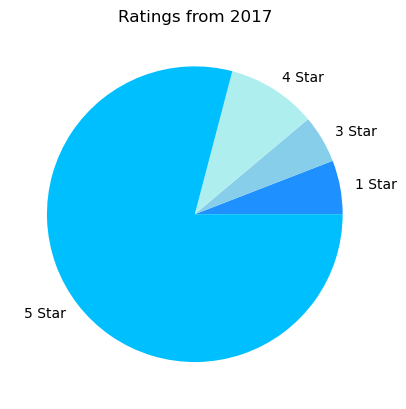

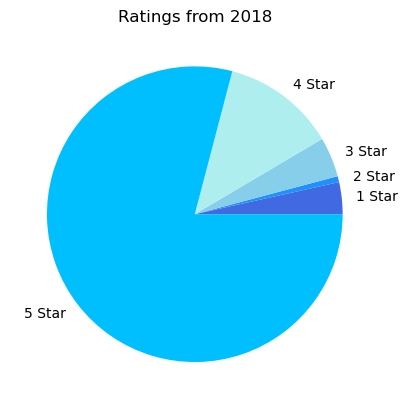

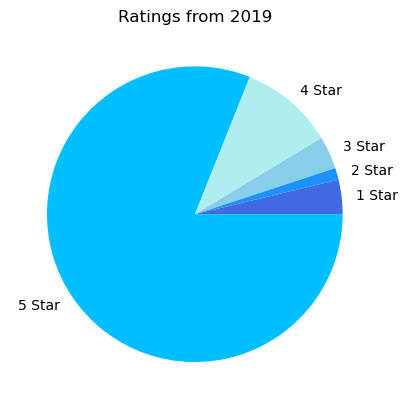

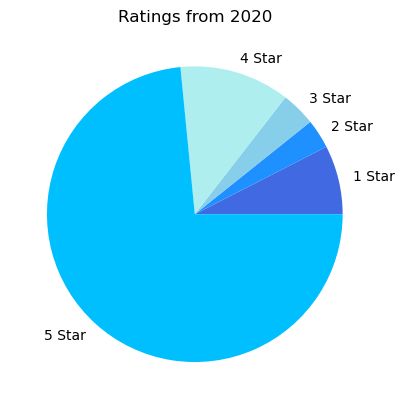

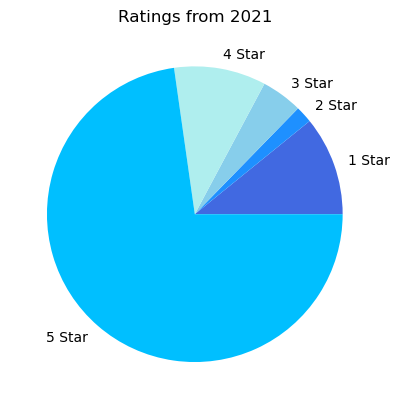

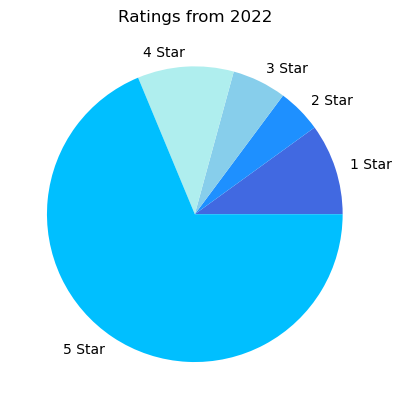

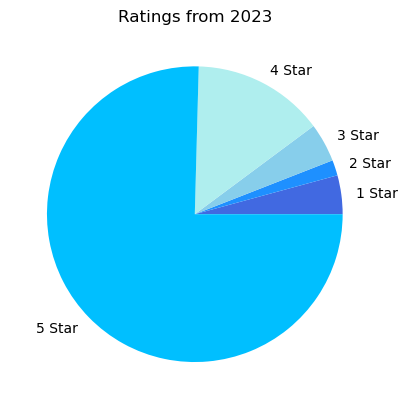

In [711]:
drawPieChart(year2015, 2015)
drawPieChart(year2016, 2016)
drawPieChart(year2017, 2017)
drawPieChart(year2018, 2018)
drawPieChart(year2019, 2019)
drawPieChart(year2020, 2020)
drawPieChart(year2021, 2021)
drawPieChart(year2022, 2022)
drawPieChart(year2023, 2023)

In [606]:
def calculatePercentages(data):
    percs = []
    for i in range(1,6):
        percs.append(sum(data['rating'] == i)/len(data))
    return percs
percAllYears = pd.DataFrame()
for i in range(2015,2024):
    percAllYears = pd.concat([percAllYears, pd.DataFrame(calculatePercentages(allYears[i])).T])
percAllYears.columns = ["1 Star", "2 Star", "3 Star", "4 Star", "5 Star"]
percAllYears

,1 Star,2 Star,3 Star,4 Star,5 Star
0,0.090909,0.000000,0.090909,0.000000,0.818182
0,0.153846,0.046154,0.046154,0.092308,0.661538
0,0.058824,0.000000,0.052288,0.098039,0.790850
0,0.034858,0.006536,0.043573,0.124183,0.790850
0,0.037523,0.013133,0.035647,0.103189,0.810507
0,0.075330,0.032015,0.037665,0.120527,0.734463
0,0.108466,0.018519,0.044974,0.100529,0.727513
0,0.099730,0.048518,0.059299,0.105121,0.687332
0,0.042373,0.016949,0.042373,0.144068,0.754237


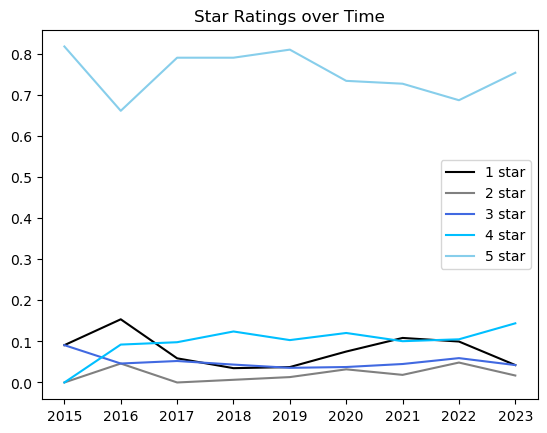

In [607]:
colors = ['black','grey','royalblue','deepskyblue','skyblue']
for i in range(5):
    plt.title("Star Ratings over Time")
    plt.plot(np.array(range(2015,2024)), np.array(percAllYears.iloc[:,i]), colors[i])
    plt.legend(['1 star','2 star','3 star','4 star','5 star'])

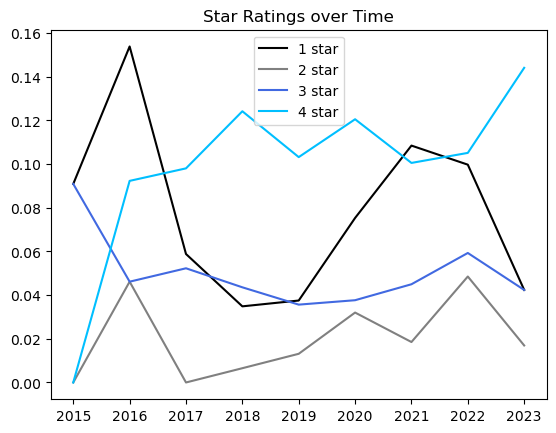

In [608]:
for i in range(4):
    plt.title("Star Ratings over Time")
    plt.plot(np.array(range(2015,2024)), np.array(percAllYears.iloc[:,i]), colors[i])
    plt.legend(['1 star','2 star','3 star','4 star','5 star'])

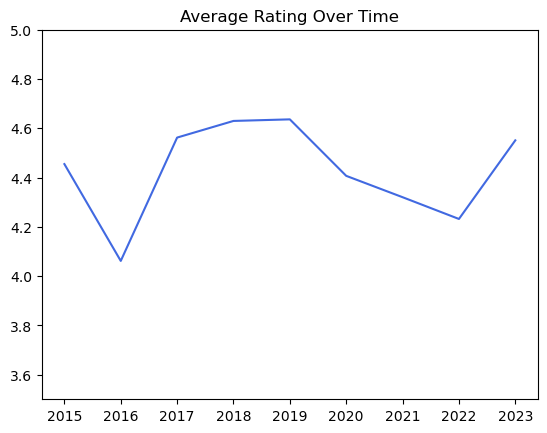

In [379]:
avgRating = []
for year in allYears:
    avgRating.append(sum(year['rating'])/len(year))

# Plot Average Rating Over Time
plt.ylim([3.5,5])
plt.title("Average Rating Over Time")
plt.plot(np.array(range(2015,2024)), np.array(avgRating), "royalblue")

In [634]:
# Identify which indices have which number of stars
yearRatingIndexDict = {}
for year in range(2015,2024):
    newDict = {}
    for i in range(1,6):
        newDict[i] = np.array(np.where(allYears[year]['rating'] == i)).tolist()[0]
    yearRatingIndexDict[year] = newDict

def extractReviews(year, rating):
    yearData = allYears[year]
    return list(yearData.iloc[yearRatingIndexDict[year][rating]].review)

In [687]:
def nstarReviews(rating):
    nStarReviews = pd.DataFrame()
    for year in range(2015, 2024):
        extractedReviews = extractReviews(year,rating)
        yearValue = [year]*len(extractedReviews)
        currentdf = pd.DataFrame(extractedReviews)
        currentdf = pd.concat([pd.DataFrame(yearValue), currentdf], axis = 1)
        nStarReviews = pd.concat([nStarReviews,currentdf])
    nStarReviews = nStarReviews.reset_index()
    nStarReviews = nStarReviews.drop('index',axis=1)
    nStarReviews.columns = ['year','review']
    return nStarReviews

In [698]:
oneStarReviews = nstarReviews(1)
twoStarReviews = nstarReviews(2)
threeStarReviews = nstarReviews(3)
fourStarReviews = nstarReviews(4)
fiveStarReviews = nstarReviews(5)

In [702]:
oneStarReviews.to_csv(r"1StarReviews.csv", index = False)
twoStarReviews.to_csv(r"2StarReviews.csv", index = False)
threeStarReviews.to_csv(r"3StarReviews.csv", index = False)
fourStarReviews.to_csv(r"4StarReviews.csv", index = False)
fiveStarReviews.to_csv(r"5StarReviews.csv", index = False)

In [706]:
print(oneStarReviews.shape,
twoStarReviews.shape,
threeStarReviews.shape,
fourStarReviews.shape,
fiveStarReviews.shape)

(179, 2) (57, 2) (115, 2) (291, 2) (1977, 2)


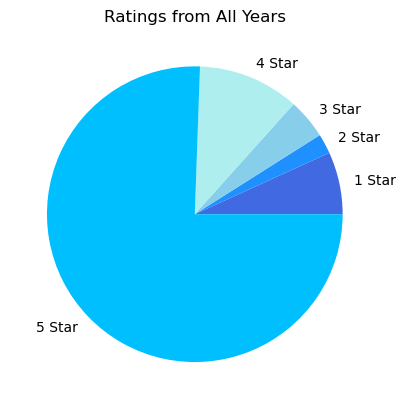

In [709]:
# Plot distribution of ratings across years
## Pie Chart
sizes = []
for i in range(1,6):
    sizes.append(sum(brilliantdata['rating'] == i)/len(brilliantdata))
#labels = '1 Star - 179 Reviews', '2 Stars - 57 Reviews', '3 Stars - 115 Reviews', '4 Stars - 291 Reviews', '5 Stars - 1977 Reviews'
labels = '1 Star', '2 Star', '3 Star', '4 Star', '5 Star'
sizes = [percOf1, percOf2, percOf3, percOf4, percOf5]
fig, ax = plt.subplots()
colors = ['deepskyblue','paleturquoise','skyblue','dodgerblue','royalblue']
colors.reverse()
plt.title("Ratings from All Years")
allratings = ax.pie(sizes, labels=labels, colors = colors)